## Cho dữ liệu mammals.csv chứa thông tin về mammals. 
## Phân tích thông tin sơ bộ về dữ liệu trên hai thuộc tính BrainWt, BodyWt, xem xét mối quan hệ của 2 thuộc tính này. Trực quan hóa dữ liệu. 

## Để dự đoán BrainWt dựa trên BodyWt cần phải kiểm tra và chuẩn hóa dữ liệu. 
## Hãy chọn một phương pháp để chuẩn hóa dữ liệu dựa trên thông tin nêu trên. Trực quan hóa dữ liệu sau khi chuẩn hóa.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import random

In [15]:
mamals = pd.read_csv("data4/Ex1_Mammals/mammals.csv")
mamals

,Unnamed: 0,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
58,59,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
59,60,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
60,61,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


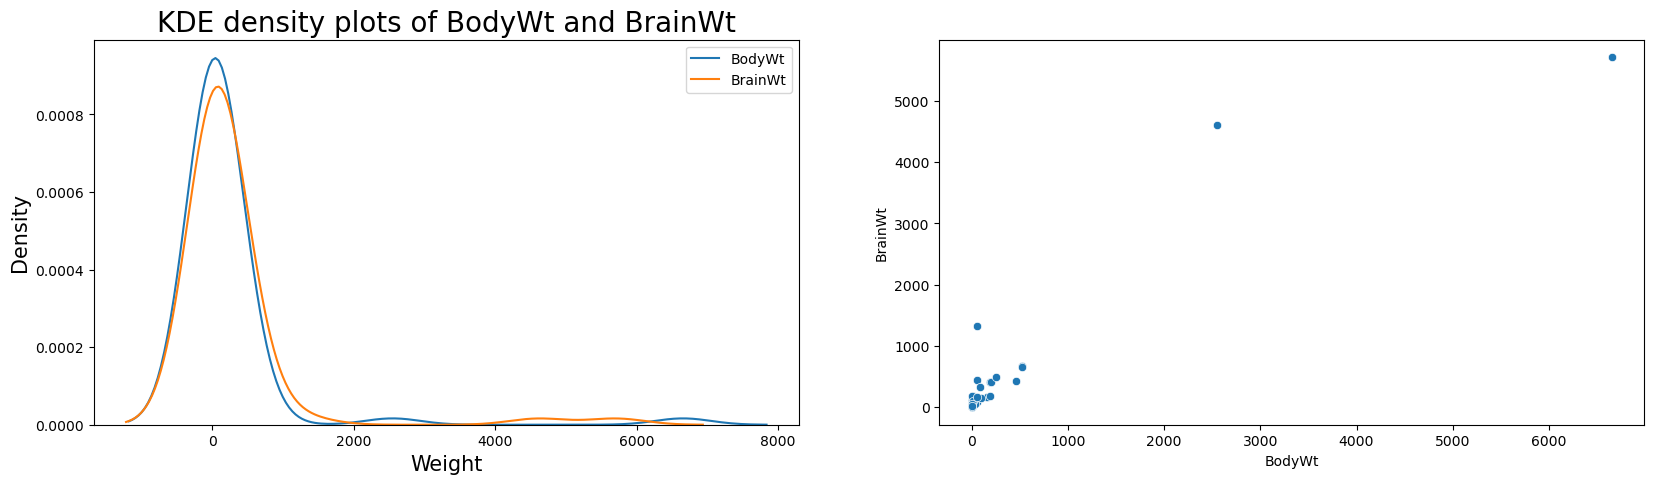


Skewness of BodyWt = 6.403731702438273
Skewness of BrainWt = 4.9480556846556585

Both BodyWt and BrainWt are right skewed => use Log normalization to reduce their skewness


In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.kdeplot(mamals['BodyWt'], label="BodyWt")
sbn.kdeplot(mamals['BrainWt'], label="BrainWt")
plt.legend()
plt.xlabel("Weight", size=15)
plt.ylabel("Density", size=15)
plt.title("KDE density plots of BodyWt and BrainWt", size=20)

plt.subplot(1,2,2)
sbn.scatterplot(mamals, x="BodyWt", y="BrainWt")
plt.show()

print(f"\nSkewness of BodyWt = {stats.skew(mamals['BodyWt'])}")
print(f"Skewness of BrainWt = {stats.skew(mamals['BrainWt'])}")
print("\nBoth BodyWt and BrainWt are right skewed => use Log normalization to reduce their skewness")

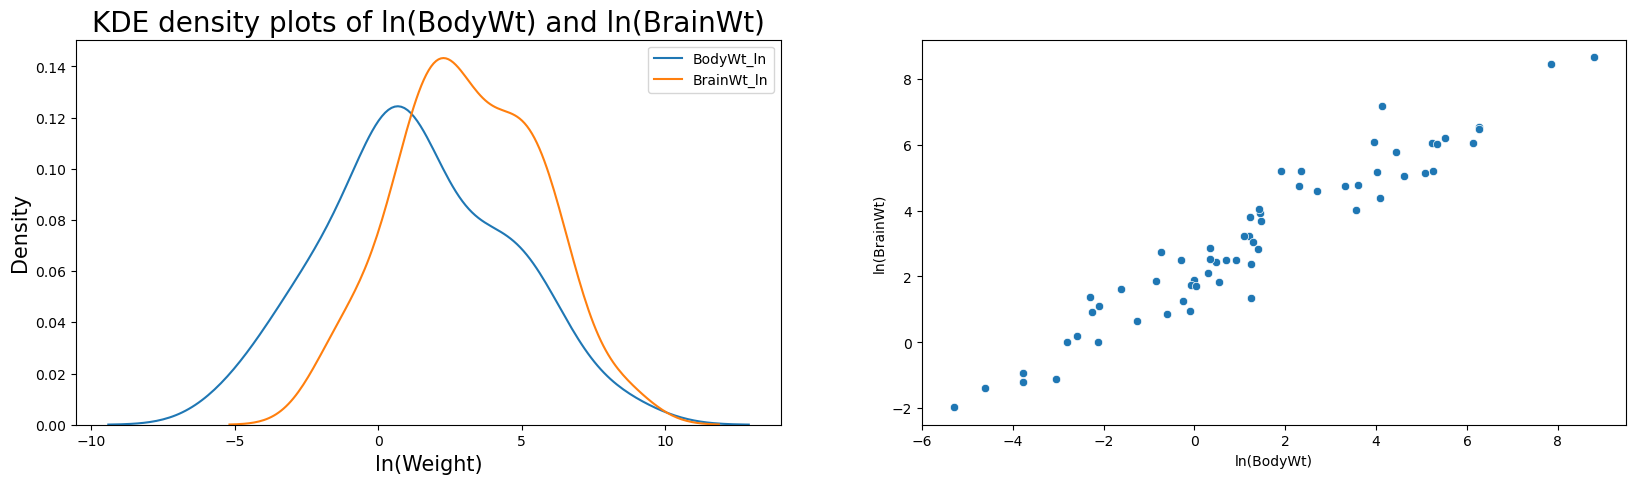


Skewness of ln(BodyWt) = 0.14894892617983124
Skewness of ln(BrainWt) = 0.044514737104552615

The right skewness magnitude has been reduced after using log napier


In [54]:
BodyWt_ln = np.log(mamals['BodyWt']) #Apply log napier to bodywt
BrainWt_ln = np.log(mamals['BrainWt']) #Apply log napier to brainwt

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.kdeplot(BodyWt_ln, label="BodyWt_ln")
sbn.kdeplot(BrainWt_ln, label="BrainWt_ln")
plt.legend()
plt.xlabel("ln(Weight)", size=15)
plt.ylabel("Density", size=15)
plt.title("KDE density plots of ln(BodyWt) and ln(BrainWt)", size=20)

plt.subplot(1,2,2)
sbn.scatterplot(x=BodyWt_ln, y=BrainWt_ln)
plt.xlabel("ln(BodyWt)")
plt.ylabel("ln(BrainWt)")
plt.show()

print(f"\nSkewness of ln(BodyWt) = {stats.skew(BodyWt_ln)}")
print(f"Skewness of ln(BrainWt) = {stats.skew(BrainWt_ln)}")
print("\nThe right skewness magnitude has been reduced after using log napier")